## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from detection_apis import get_img_obj_points
#from detection_apis import cal_undistort
from detection_apis import *
%matplotlib qt    

In [2]:
def fetch_img_obj_point_list():
    fnames = glob.glob("camera_cal/*.jpg")
    img_points_list = []
    obj_points_list = []
    for fname in fnames:
        img = cv2.imread(fname)
        nx = 9  # the number of inside corners in x
        ny = 6  # the number of inside corners in y
        img_points, obj_points = get_img_obj_points(img, nx, ny)
        img_points_list += img_points
        obj_points_list += obj_points
    return img_points_list, obj_points_list  

In [3]:
img_points_list, obj_points_list = fetch_img_obj_point_list()

In [4]:
def undistort_print(img_dir):
    #fnames = glob.glob("camera_cal/*.jpg")
    #fnames = os.listdir('camera_cal/')
    fnames = os.listdir(img_dir)
    for img in fnames:
        #img = mpimg.imread('camera_cal/calibration1.jpg')
        img = img_dir + img
        img = mpimg.imread(img)
        height, width  = img.shape[0], img.shape[1]
        undistorted, dist, mtx = cal_undistort(img, obj_points_list, img_points_list)

        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f.tight_layout()
        ax1.imshow(img)
        ax1.set_title('Original Image', fontsize=50)
        ax2.imshow(undistorted)
        ax2.set_title('Undistorted and Warped Image', fontsize=50)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
        plt.show()

In [5]:
#img_dir = 'camera_cal/'
#undistort_print(img_dir)

In [6]:
#img_dir = 'test_images/'
#undistort_print(img_dir)

In [7]:
# develop a pipeline using an example

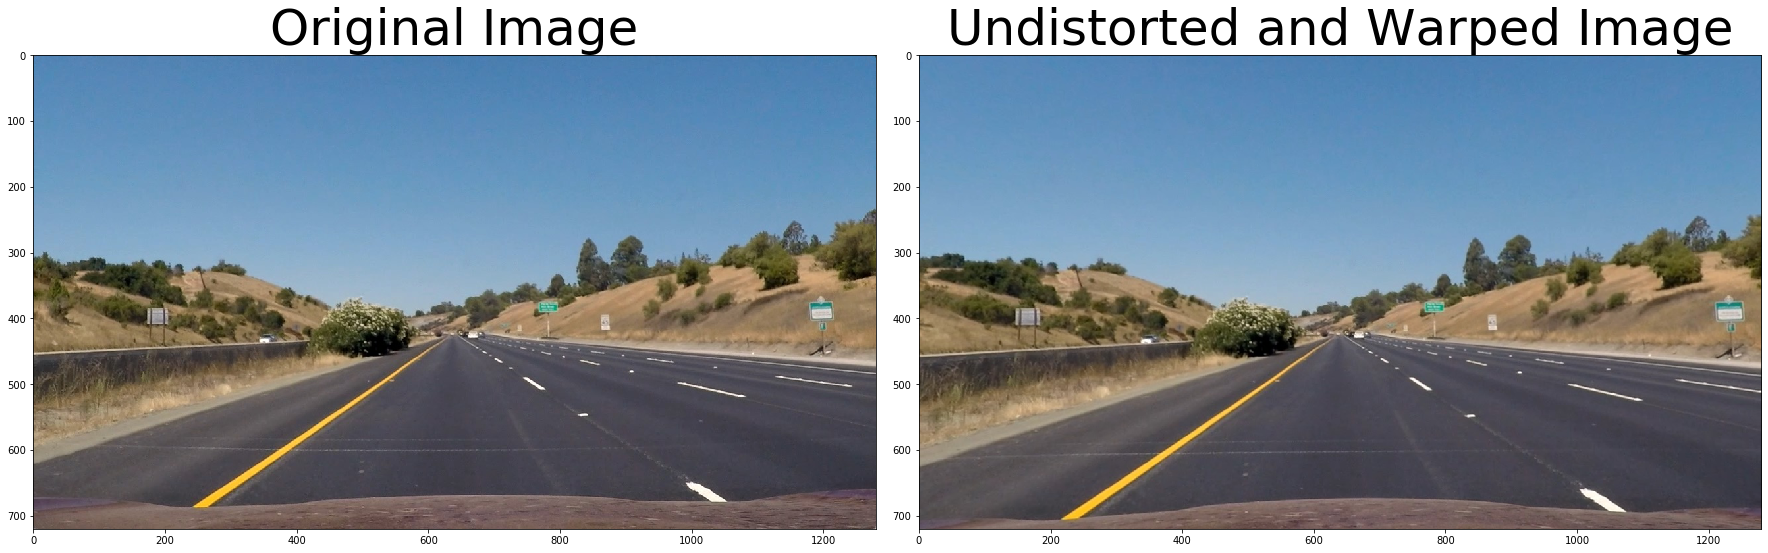

In [8]:
# pick a test image
img = mpimg.imread('test_images/straight_lines1.jpg')
height, width  = img.shape[0], img.shape[1]
undistorted, dist, mtx = cal_undistort(img, obj_points_list, img_points_list)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

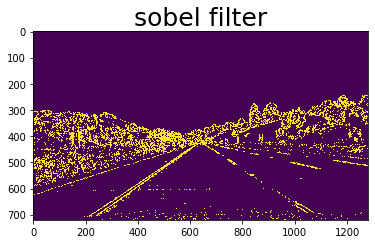

In [9]:
# apply sobel filters
plt.title('sobel filter', fontsize=25)
image = np.copy(undistorted)
combined = np.zeros((height,width), dtype = np.uint8)
combined_condition = sobel_filter(image)
combined[combined_condition] = 1
plt.imshow(combined)
plt.show()

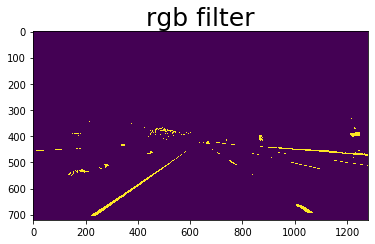

In [10]:
# apply rgb filter
plt.title('rgb filter', fontsize=25)
rgb = np.copy(undistorted)
color_combined = np.zeros((height,width), dtype = np.uint8)
r_g_condition = rgb_filter(rgb)
color_combined[r_g_condition] = 1
plt.imshow(color_combined)
plt.show()

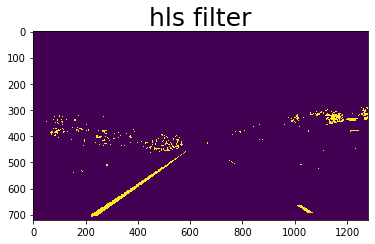

In [11]:
plt.title('hls filter', fontsize=25)
img = np.copy(undistorted)
s_binary = np.zeros((height,width), dtype = np.uint8)
s_binary_condition = hls_filter(img)
s_binary[s_binary_condition] = 1
plt.imshow(s_binary)
plt.show()

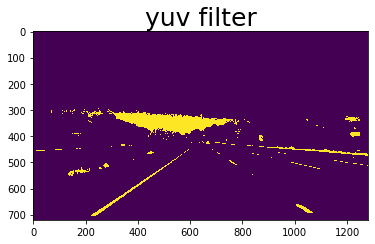

In [12]:
plt.title('yuv filter', fontsize=25)
img = np.copy(undistorted)
yuv = np.zeros((height,width), dtype = np.uint8)
yuv_condition = yuv_filter(img)
yuv[yuv_condition] = 1
plt.imshow(yuv)
plt.show()


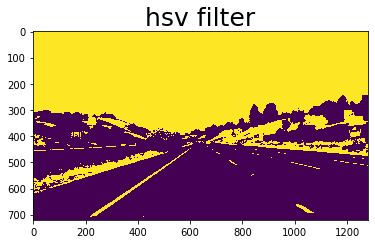

In [13]:
plt.title('hsv filter', fontsize=25)

img = np.copy(undistorted)
hsv = np.zeros((height,width), dtype = np.uint8)
hsv_condition = hsv_filter(img)
hsv[hsv_condition] = 1
plt.imshow(hsv)
plt.show()

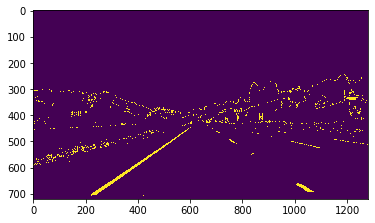

In [14]:
# Combine two binary threshold
combined_binary = np.zeros((height,width), dtype = np.uint8)
combined_binary[(r_g_condition | yuv_condition | hsv_condition) & (s_binary_condition | combined_condition )] = 1
plt.imshow(combined_binary)
plt.show()

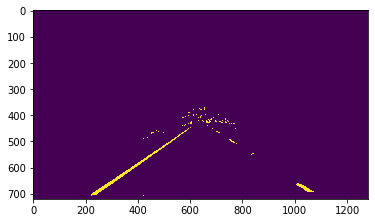

In [15]:
# region of intersection & combining filters
filtered_image = filter_image(undistorted.copy())
plt.imshow(filtered_image)
plt.show()

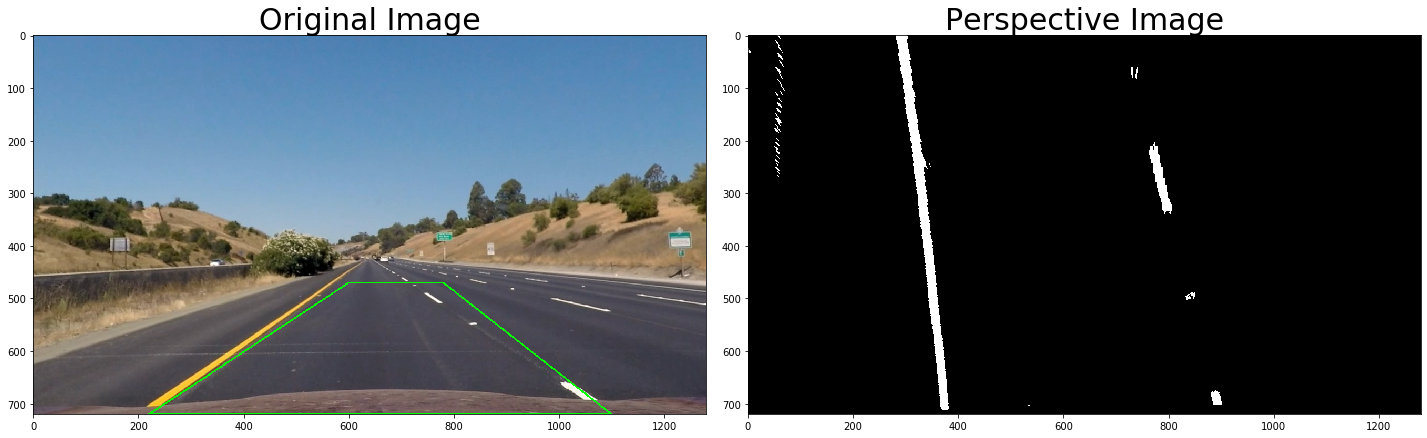

In [16]:
# perform a perspective transform with manually extracted vertices
warped, filled = perspective_transform_with_filled_area(img.copy(), filtered_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
f.tight_layout()
ax1.imshow(filled)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Perspective Image', fontsize=30)
plt.show()

360


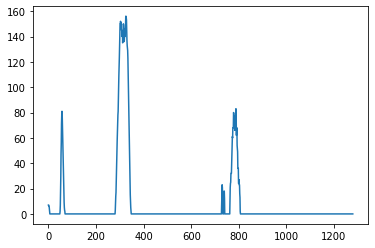

In [17]:
# previous image histogram
print(warped.shape[0]//2)
histogram = np.sum(warped[:warped.shape[0]//2,:], axis=0)
plt.plot(histogram)
plt.show()

(720, 0)

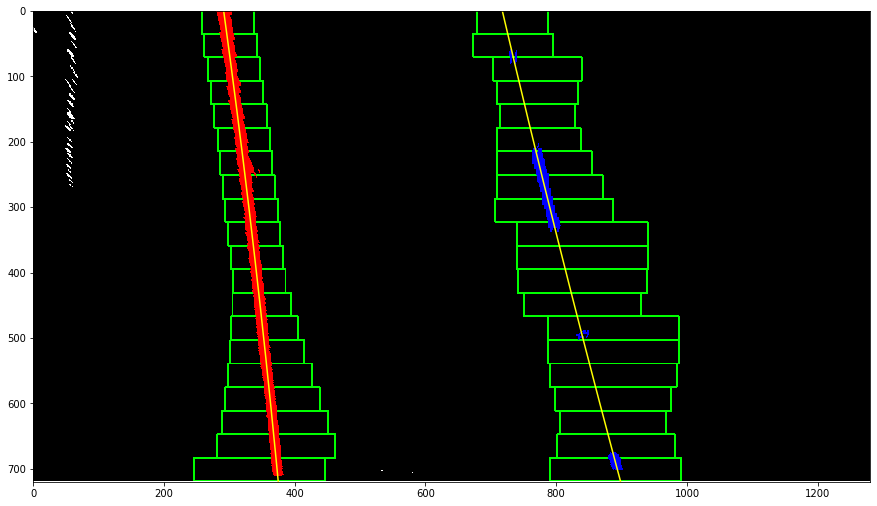

In [18]:
# polynomial lines drawing
ploty, left_fitx, right_fitx, left_fit, right_fit, out_img = get_lane_rectangles(warped)

# generate x & y values to plot
plt.figure(figsize=(15,15))
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

(720, 0)

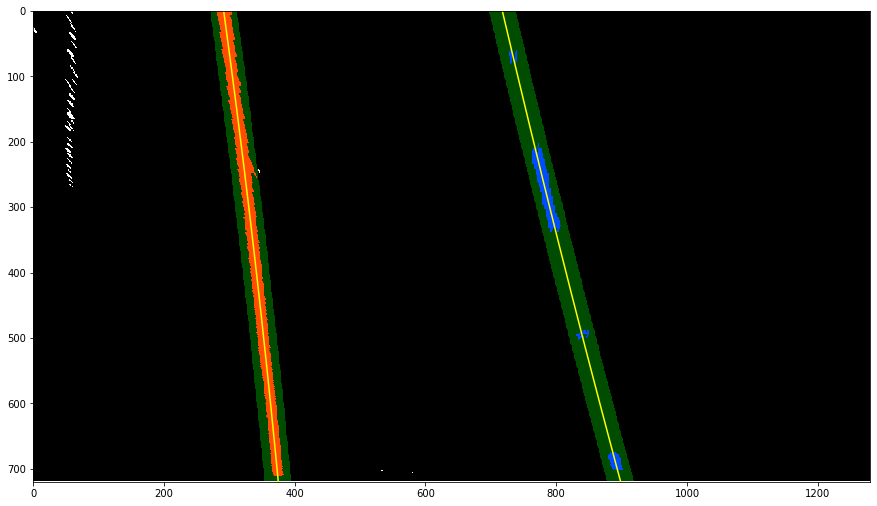

In [19]:
result, ploty, left_fitx, right_fitx, left_fit, right_fit, is_blind = get_next_frame_lines(warped, left_fit, right_fit)
plt.figure(figsize=(15,15))
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [20]:
# curve radius cal
left_rad_curvature = get_curvature_radius(left_fit, ploty)
right_rad_curvature = get_curvature_radius(right_fit, ploty)
avg_rad_curvature = (left_rad_curvature+right_rad_curvature)/2

center_offset = get_offset_from_center(left_fitx, right_fitx)
print('radius : ', avg_rad_curvature)
print('offset', center_offset)

radius :  6287.185930098554
offset 0.017982552556842054


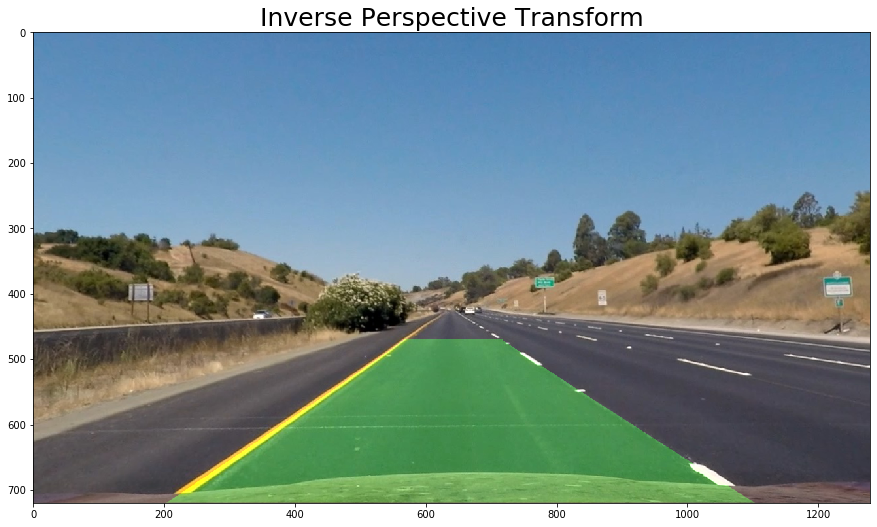

In [21]:
# inv perspective transformation
result = inverse_perspective_transform(img, warped, left_fitx, right_fitx, ploty)
plt.figure(figsize=(15, 15))
plt.title("Inverse Perspective Transform", fontsize = 25)
plt.imshow(result)

In [22]:
def final_pipeline(img):
    global caches 
    is_blind = False
    left_fit, right_fit = None, None
    #caches = []

    if caches:
        left_fit, right_fit, is_blind  = caches
        
    filtered_image = filter_image(img, is_blind) 
    warped, filled = perspective_transform_with_filled_area(img, filtered_image)
    
    #The line below is added only for the first initial frame and for diagnostic purposes 
    ploty, left_fitx, right_fitx, left_fit, right_fit, deep_search = get_lane_rectangles(warped, left_fit, right_fit, is_blind)
    if not caches : 
        caches = [left_fit, right_fit, is_blind]

    if caches : 
        left_fit, right_fit, is_blind  = caches
        out_img, ploty, left_fitx, right_fitx, left_fit, right_fit, is_blind = get_next_frame_lines(warped, left_fit, right_fit, is_blind)
        caches = [left_fit, right_fit, is_blind]

    result = inverse_perspective_transform(img, warped, left_fitx, right_fitx, ploty)

    left_rad_curvature = get_curvature_radius(left_fit, ploty)
    right_rad_curvature = get_curvature_radius(right_fit, ploty)
    avg_rad_curvature = (left_rad_curvature+right_rad_curvature)/2
    radius_text = "curvature radius : " + str(int(avg_rad_curvature)) + "m"
    
    center_offset = get_offset_from_center(left_fitx, right_fitx)
    center_offset_text = "center offset : %.2f m" % center_offset

    result  = add_diagnostic_image(result, filtered_image, 0)
    result  = add_diagnostic_image(result, warped, 1)
    result  = add_diagnostic_image(result, deep_search, 2)
    result  = add_diagnostic_image(result, out_img, 3)
    result  = add_diagnostic_text(result, radius_text, 5, offset=150)
    result  = add_diagnostic_text(result, center_offset_text, 5, offset=190)

    return result

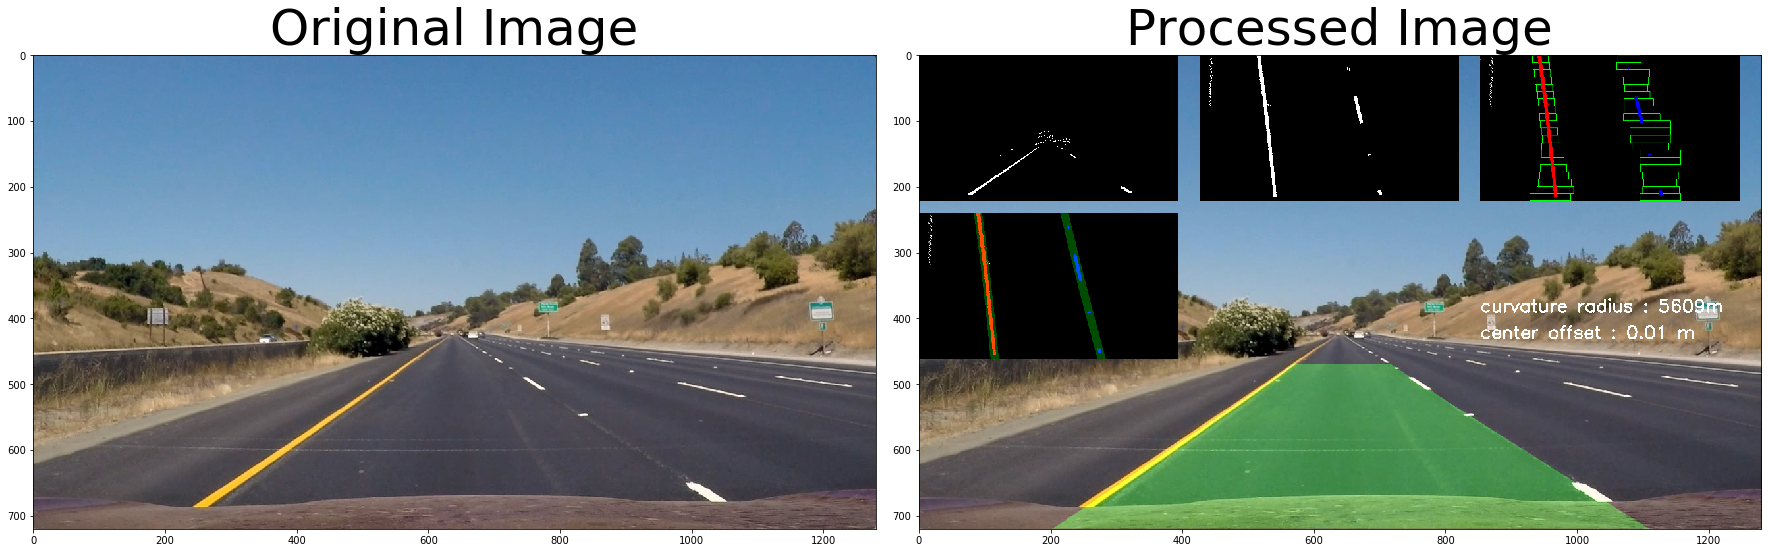

In [23]:
img = mpimg.imread('test_images/straight_lines1.jpg')

# reinit global caches
caches = []

# Apply pipeline
processed = final_pipeline(img)

# Plot the 2 images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(processed, cmap='gray')
ax2.set_title('Processed Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [24]:
from moviepy.editor import VideoFileClip

# re-init global caches
caches = [] 

output_file = 'challenge_video_output.mp4'
clip1 = VideoFileClip("challenge_video.mp4")
output_clip = clip1.fl_image(final_pipeline) 
output_clip.write_videofile(output_file)

chunk:  65%|██████▍   | 231/357 [00:00<00:00, 1124.16it/s, now=None]

Moviepy - Building video challenge_video_output.mp4.
MoviePy - Writing audio in challenge_video_outputTEMP_MPY_wvf_snd.mp3


t:   0%|          | 2/485 [00:00<00:38, 12.40it/s, now=None]        

MoviePy - Done.
Moviepy - Writing video challenge_video_output.mp4



Moviepy - Done !
Moviepy - video ready challenge_video_output.mp4
